# EDA HAPPINESS

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [11]:
#한글폰트 설정
import matplotlib
import matplotlib.font_manager as fm

font_path="C:\\Windows\\Fonts\\malgun.ttf" #윈도우 os폰트 경로
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
matplotlib.rc('font',family=font_name)
plt.rc('axes', unicode_minus=False) #(matplotlib이 기본적으로 사용하는 유니코드 마이너스 비활성화 ,아스키코드 마이너스 사용)

## 01. 데이터 수집 및 로딩

In [12]:
df_2015 = pd.read_csv('data/2015.csv')
df_2019 = pd.read_csv('data/2019.csv')


In [13]:
print(df_2015.columns)
print(df_2019.columns)


Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


In [14]:
df_2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [15]:
df_2019

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [16]:
# 1. 일부 컬럼은 수동으로 원하는 이름 지정
df_2015 = df_2015.rename(columns={
    'Economy (GDP per Capita)': '2015_GDP per capita',
    'Health (Life Expectancy)': '2015_Healthy life expectancy',
    'Trust (Government Corruption)': '2015_Perceptions of corruption',
    'Happiness Rank': '2015_Happiness Rank',
    'Region': '2015_Region'
})

# 2. 나머지 컬럼에도 '2015_' 접두어 붙이기 (Country는 예외)
df_2015.columns = [
    col if col in ['Country'] or col.startswith('2015_') else f'2015_{col}'
    for col in df_2015.columns
]

# 결과 확인
print(df_2015.columns)


Index(['Country', '2015_Region', '2015_Happiness Rank', '2015_Happiness Score',
       '2015_Standard Error', '2015_GDP per capita', '2015_Family',
       '2015_Healthy life expectancy', '2015_Freedom',
       '2015_Perceptions of corruption', '2015_Generosity',
       '2015_Dystopia Residual'],
      dtype='object')


In [17]:
# 1. 일부 컬럼 수동 변경
df_2019 = df_2019.rename(columns={
    'Freedom to make life choices': '2019_Freedom',
    'Country or region': 'Country',  # 병합용 키이므로 2019_ 안 붙임
    'Overall rank': '2019_Happiness Rank'
})

# 2. 나머지 컬럼에도 '2019_' 접두어 붙이기 (Country는 예외)
df_2019.columns = [
    col if col in ['Country'] or col.startswith('2019_') else f'2019_{col}'
    for col in df_2019.columns
]

# 3. 결과 확인
print(df_2019.columns)


Index(['2019_Happiness Rank', 'Country', '2019_Score', '2019_GDP per capita',
       '2019_Social support', '2019_Healthy life expectancy', '2019_Freedom',
       '2019_Generosity', '2019_Perceptions of corruption'],
      dtype='object')


## 데이터 병합

In [18]:
# Country 기준으로 병합 (두 연도 모두 있는 국가만)
df_merge = pd.merge(df_2015, df_2019, on='Country', how='inner')

print(df_merge.shape)
print(df_merge.head())



(149, 20)
       Country     2015_Region  2015_Happiness Rank  2015_Happiness Score  \
0  Switzerland  Western Europe                    1                 7.587   
1      Iceland  Western Europe                    2                 7.561   
2      Denmark  Western Europe                    3                 7.527   
3       Norway  Western Europe                    4                 7.522   
4       Canada   North America                    5                 7.427   

   2015_Standard Error  2015_GDP per capita  2015_Family  \
0              0.03411              1.39651      1.34951   
1              0.04884              1.30232      1.40223   
2              0.03328              1.32548      1.36058   
3              0.03880              1.45900      1.33095   
4              0.03553              1.32629      1.32261   

   2015_Healthy life expectancy  2015_Freedom  2015_Perceptions of corruption  \
0                       0.94143       0.66557                         0.41978   
1   

In [19]:
# 행복 점수 변화 (양수면 상승, 음수면 하락)
df_merge['Score_Diff'] = df_merge['2019_Score'] - df_merge['2015_Happiness Score']

# GDP 변화
df_merge['GDP_Diff'] = df_merge['2019_GDP per capita'] - df_merge['2015_GDP per capita']

# 순위 변화 (값이 클수록 순위가 좋아진 것)
df_merge['Rank_Diff'] = df_merge['2015_Happiness Rank'] - df_merge['2019_Happiness Rank']

print(df_merge[['Country', 'Score_Diff', 'GDP_Diff', 'Rank_Diff']].head())


       Country  Score_Diff  GDP_Diff  Rank_Diff
0  Switzerland      -0.107   0.05549         -5
1      Iceland      -0.067   0.07768         -2
2      Denmark       0.073   0.05752          1
3       Norway       0.032   0.02900          1
4       Canada      -0.149   0.03871         -4


## 데이터 로딩

In [20]:
df_merge.columns

Index(['Country', '2015_Region', '2015_Happiness Rank', '2015_Happiness Score',
       '2015_Standard Error', '2015_GDP per capita', '2015_Family',
       '2015_Healthy life expectancy', '2015_Freedom',
       '2015_Perceptions of corruption', '2015_Generosity',
       '2015_Dystopia Residual', '2019_Happiness Rank', '2019_Score',
       '2019_GDP per capita', '2019_Social support',
       '2019_Healthy life expectancy', '2019_Freedom', '2019_Generosity',
       '2019_Perceptions of corruption', 'Score_Diff', 'GDP_Diff',
       'Rank_Diff'],
      dtype='object')

In [21]:
df_merge.shape

(149, 23)

## 02. 데이터 구조 및 변수 이해

In [22]:
df_merge

,Country,2015_Region,2015_Happiness Rank,2015_Happiness Score,2015_Standard Error,2015_GDP per capita,2015_Family,2015_Healthy life expectancy,2015_Freedom,2015_Perceptions of corruption,...,2019_Score,2019_GDP per capita,2019_Social support,2019_Healthy life expectancy,2019_Freedom,2019_Generosity,2019_Perceptions of corruption,Score_Diff,GDP_Diff,Rank_Diff
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,7.480,1.452,1.526,1.052,0.572,0.263,0.343,-0.107,0.05549,-5
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,7.494,1.380,1.624,1.026,0.591,0.354,0.118,-0.067,0.07768,-2
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,7.600,1.383,1.573,0.996,0.592,0.252,0.410,0.073,0.05752,1
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,7.554,1.488,1.582,1.028,0.603,0.271,0.341,0.032,0.02900,1
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,7.278,1.365,1.505,1.039,0.584,0.285,0.308,-0.149,0.03871,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,...,3.334,0.359,0.711,0.614,0.555,0.217,0.411,-0.131,0.13692,2
145,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,...,4.883,0.393,0.437,0.397,0.349,0.175,0.082,1.543,0.10635,53
146,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,...,3.462,0.619,0.378,0.440,0.013,0.331,0.141,0.456,-0.04420,7
147,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,...,3.775,0.046,0.447,0.380,0.220,0.176,0.180,0.870,0.03070,12


In [23]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         149 non-null    object 
 1   2015_Region                     149 non-null    object 
 2   2015_Happiness Rank             149 non-null    int64  
 3   2015_Happiness Score            149 non-null    float64
 4   2015_Standard Error             149 non-null    float64
 5   2015_GDP per capita             149 non-null    float64
 6   2015_Family                     149 non-null    float64
 7   2015_Healthy life expectancy    149 non-null    float64
 8   2015_Freedom                    149 non-null    float64
 9   2015_Perceptions of corruption  149 non-null    float64
 10  2015_Generosity                 149 non-null    float64
 11  2015_Dystopia Residual          149 non-null    float64
 12  2019_Happiness Rank             149 

## 03. 데이터 요약 및 기술 통계

In [24]:
import pandas as pd

# 실제 데이터프레임의 컬럼명에 맞는 리스트로 지정
numeric_cols = [
    '2015_Happiness Score', '2015_GDP per capita', '2015_Family', '2015_Healthy life expectancy',
    '2015_Freedom', '2015_Perceptions of corruption', '2015_Generosity', '2015_Dystopia Residual',
    '2019_Score', '2019_GDP per capita', '2019_Social support', '2019_Healthy life expectancy',
    '2019_Freedom', '2019_Perceptions of corruption', '2019_Generosity',
    'Score_Diff', 'GDP_Diff'
]

# 통계 요약 계산
summary_df = df_merge[numeric_cols].agg(['mean', 'median', 'std', 'min', 'max']).T

# 컬럼 한글명
summary_df.columns = ['평균', '중앙값', '표준편차', '최솟값', '최댓값']

# 예쁘게 출력 (소수점 둘째자리, 표 제목)
summary_table = summary_df.round(2).style.set_caption("수치형 변수 요약 통계 (순위 제외)").format("{:.2f}")

# Jupyter에서 보기 좋게 출력
display(summary_table)





,평균,중앙값,표준편차,최솟값,최댓값
2015_Happiness Score,5.38,5.25,1.16,2.84,7.59
2015_GDP per capita,0.85,0.90,0.40,0.00,1.69
2015_Family,0.99,1.04,0.28,0.00,1.40
2015_Healthy life expectancy,0.63,0.70,0.25,0.00,1.03
2015_Freedom,0.43,0.43,0.15,0.00,0.67
2015_Perceptions of corruption,0.14,0.11,0.12,0.00,0.55
2015_Generosity,0.24,0.22,0.13,0.00,0.80
2015_Dystopia Residual,2.10,2.09,0.56,0.33,3.60
2019_Score,5.43,5.42,1.11,3.08,7.77
2019_GDP per capita,0.91,0.96,0.39,0.03,1.68


In [25]:
import pandas as pd
from IPython.display import display

# 국가별 2015년과 2019년 행복 점수 평균 계산
country_happiness = df_merge.groupby('Country')[['2015_Happiness Score', '2019_Score']].mean().reset_index()

# 소수점 둘째 자리까지 반올림
country_happiness_rounded = country_happiness.round(2)

# 예쁘게 출력 (Jupyter Notebook 전용)
display(
    country_happiness_rounded.style
    .set_caption("국가별 2015년과 2019년 행복 점수 평균")
    .format({"2015_Happiness Score": "{:.2f}", "2019_Score": "{:.2f}"})
)


,Country,2015_Happiness Score,2019_Score
0,Afghanistan,3.58,3.20
1,Albania,4.96,4.72
2,Algeria,5.60,5.21
3,Argentina,6.57,6.09
4,Armenia,4.35,4.56
5,Australia,7.28,7.23
6,Austria,7.20,7.25
7,Azerbaijan,5.21,5.21
8,Bahrain,5.96,6.20
9,Bangladesh,4.69,4.46


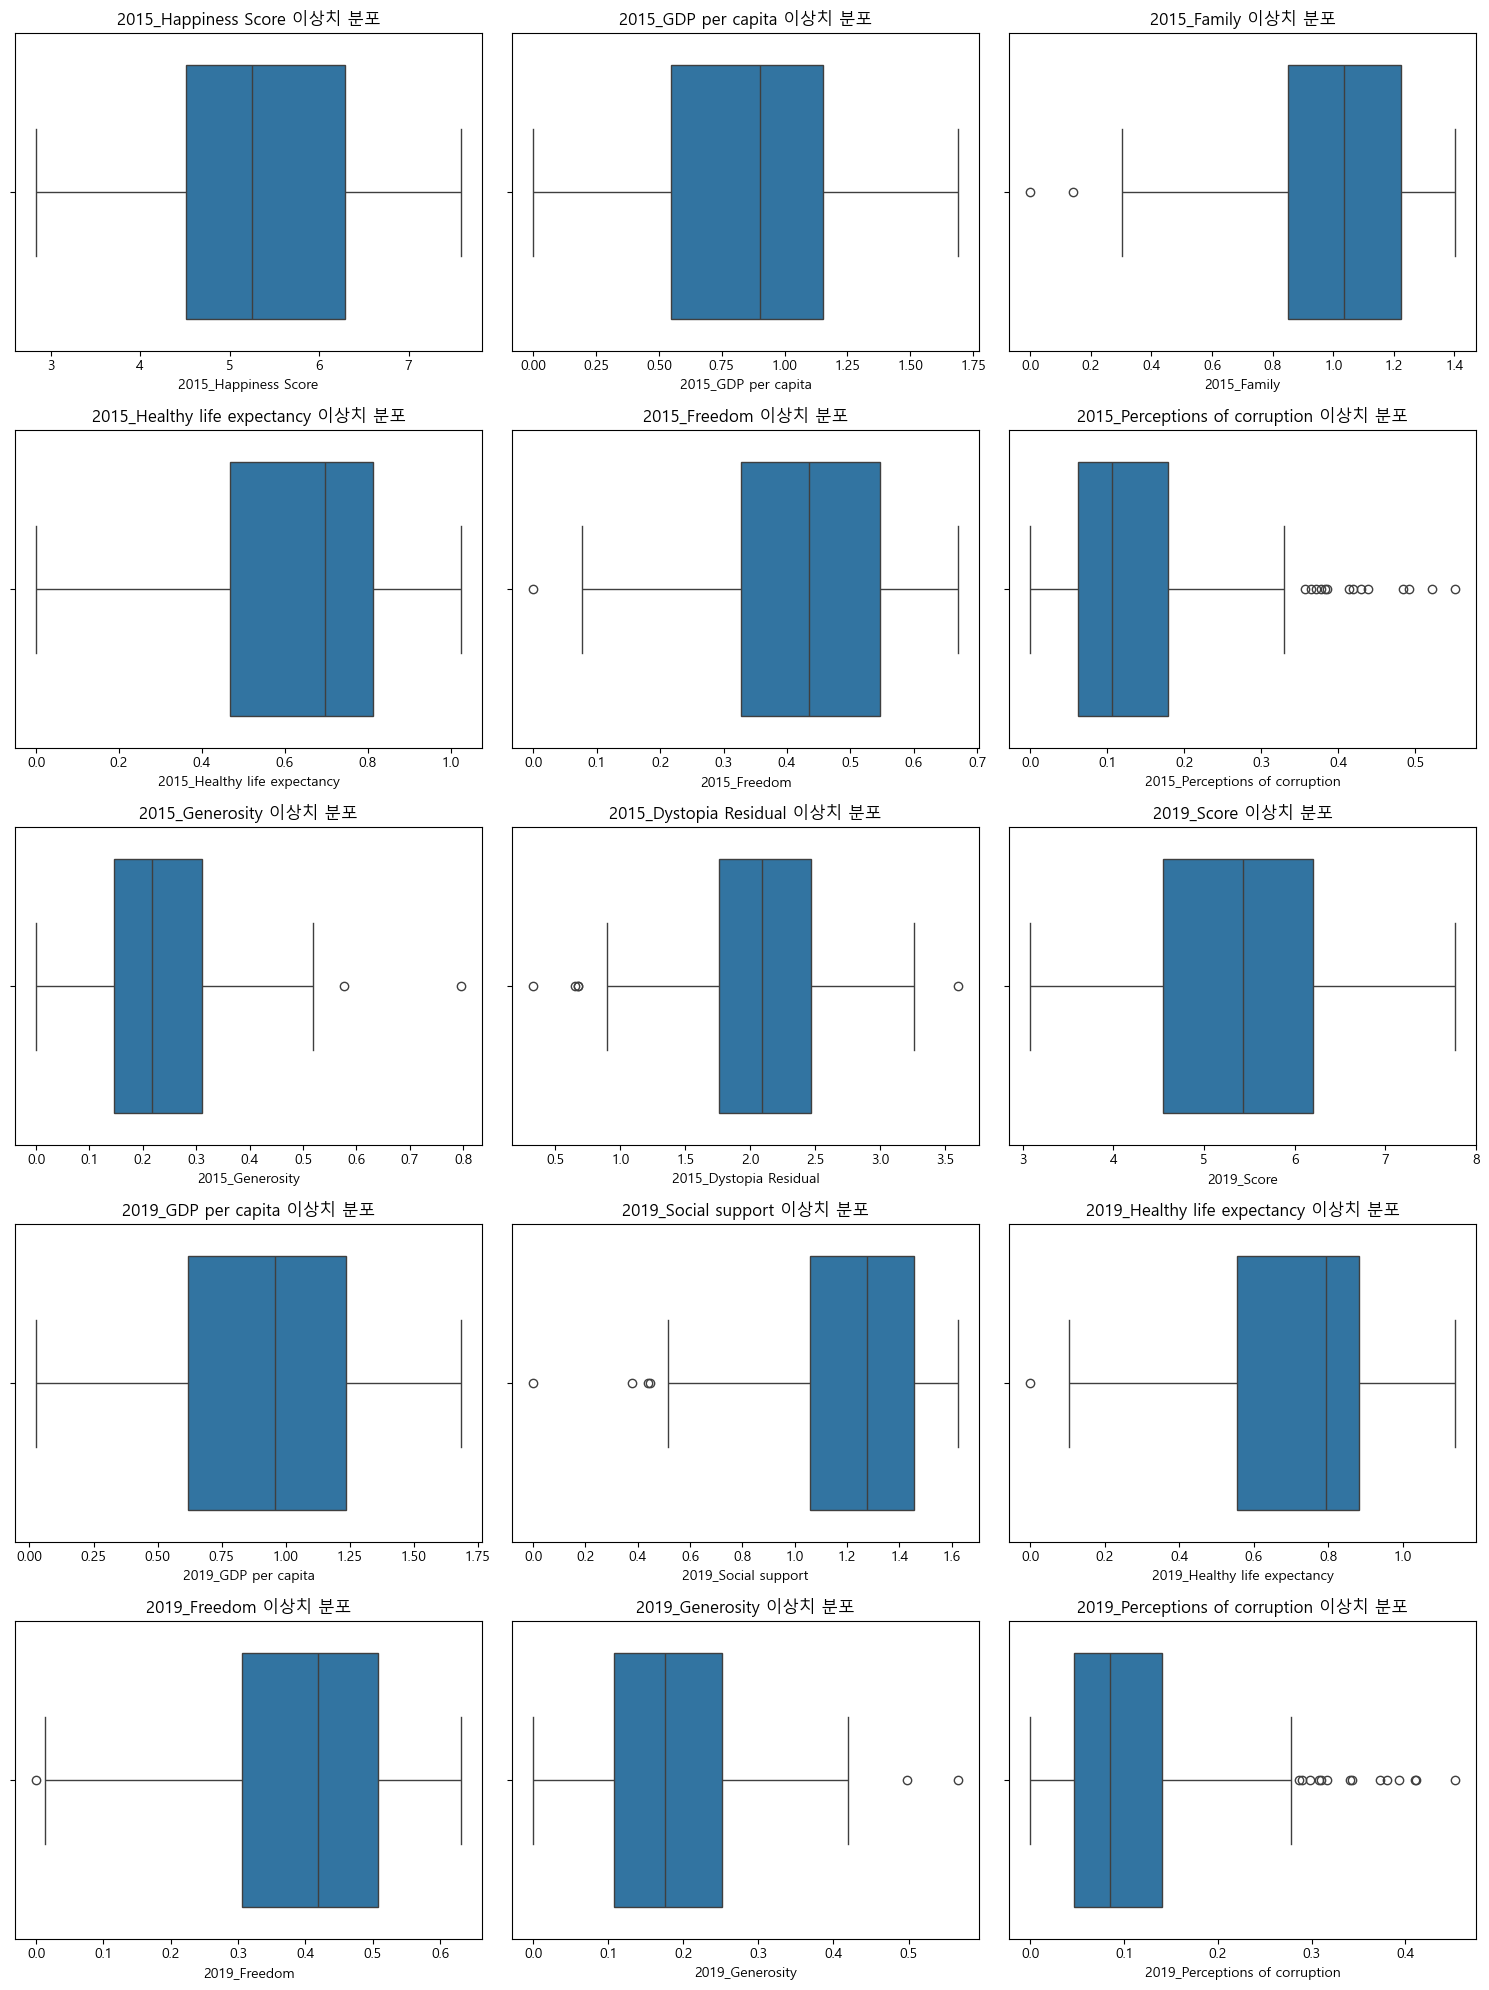

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# 제외할 컬럼 리스트
exclude_cols = ['2015_Standard Error', 'Score_Diff', 'GDP_Diff']

# 전체 수치형 변수 리스트에서 제외할 컬럼을 뺀 최종 변수 리스트 생성
numeric_cols_filtered = [
    col for col in [
        '2015_Happiness Score', '2015_Standard Error', '2015_GDP per capita', '2015_Family',
        '2015_Healthy life expectancy', '2015_Freedom', '2015_Perceptions of corruption',
        '2015_Generosity', '2015_Dystopia Residual', '2019_Score', '2019_GDP per capita',
        '2019_Social support', '2019_Healthy life expectancy', '2019_Freedom',
        '2019_Generosity', '2019_Perceptions of corruption', 'Score_Diff', 'GDP_Diff'
    ] if col not in exclude_cols
]

def plot_outliers(df, cols, n_cols=3):
    n_rows = (len(cols) + n_cols - 1) // n_cols
    plt.figure(figsize=(5 * n_cols, 4 * n_rows))
    
    for i, col in enumerate(cols):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.boxplot(x=df[col])
        plt.title(f'{col} 이상치 분포')
        plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()

# 이상치 박스플롯 호출 (df_merge는 병합된 데이터프레임)
plot_outliers(df_merge, numeric_cols_filtered)


In [27]:
import numpy as np

def fill_outliers_with_median_repeat(df, cols):
    df_filled = df.copy()
    for col in cols:
        while True:
            Q1 = df_filled[col].quantile(0.25)
            Q3 = df_filled[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            # 이상치 탐색
            outlier_idx = (df_filled[col] < lower) | (df_filled[col] > upper)
            if not outlier_idx.any():
                break  # 더 이상 이상치가 없으면 중단
            median = df_filled[col].median()
            df_filled.loc[outlier_idx, col] = median
    return df_filled

# 적용
df_filled = fill_outliers_with_median_repeat(df_merge, numeric_cols_filtered)



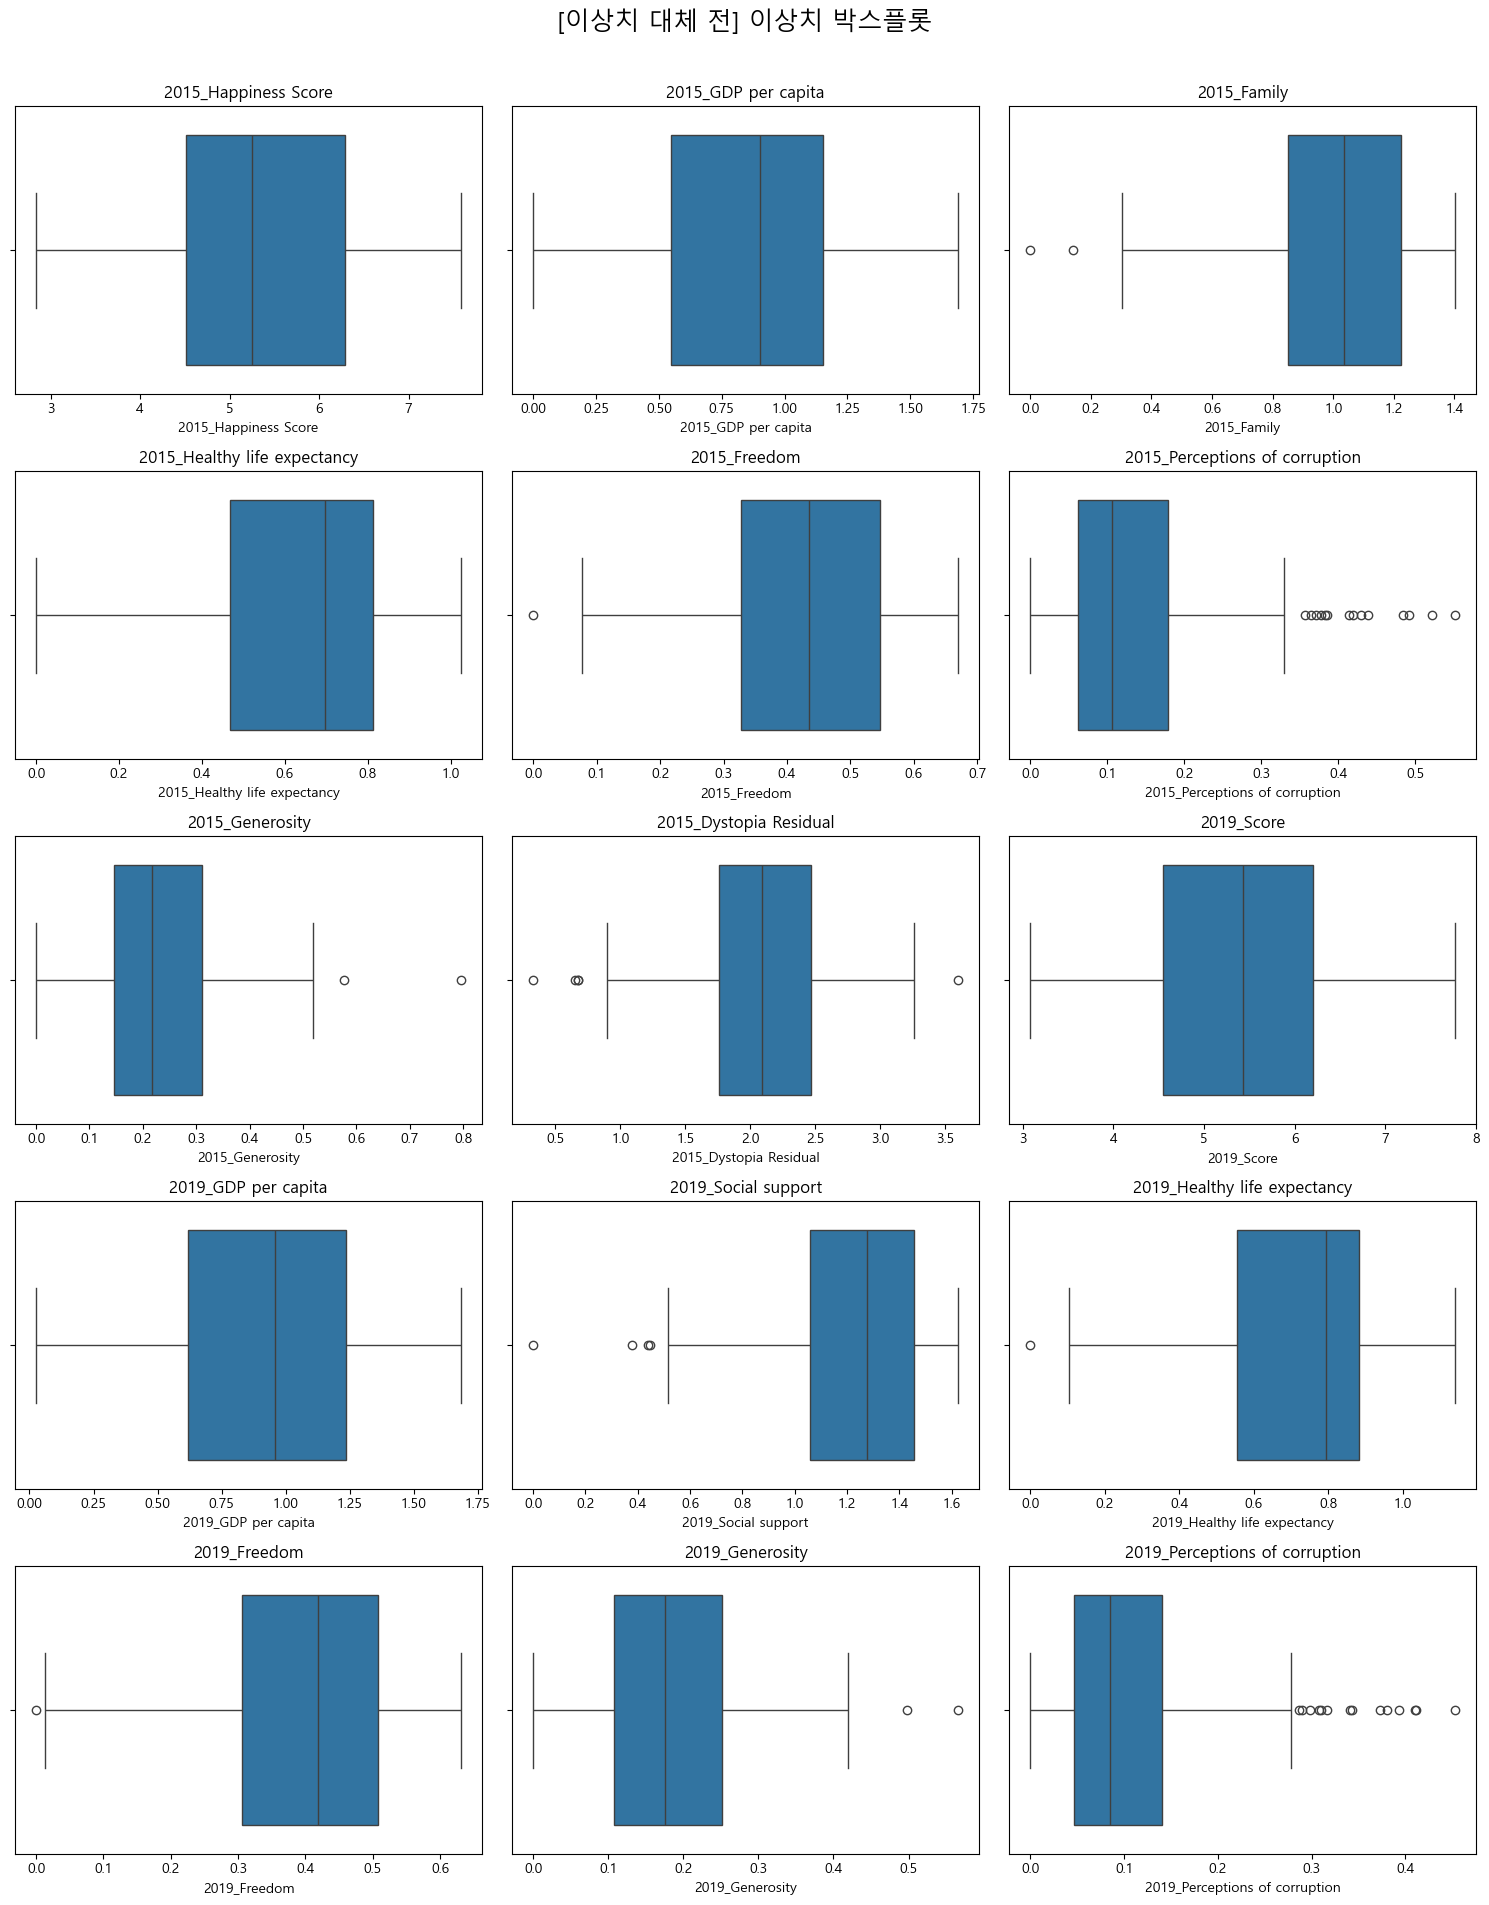

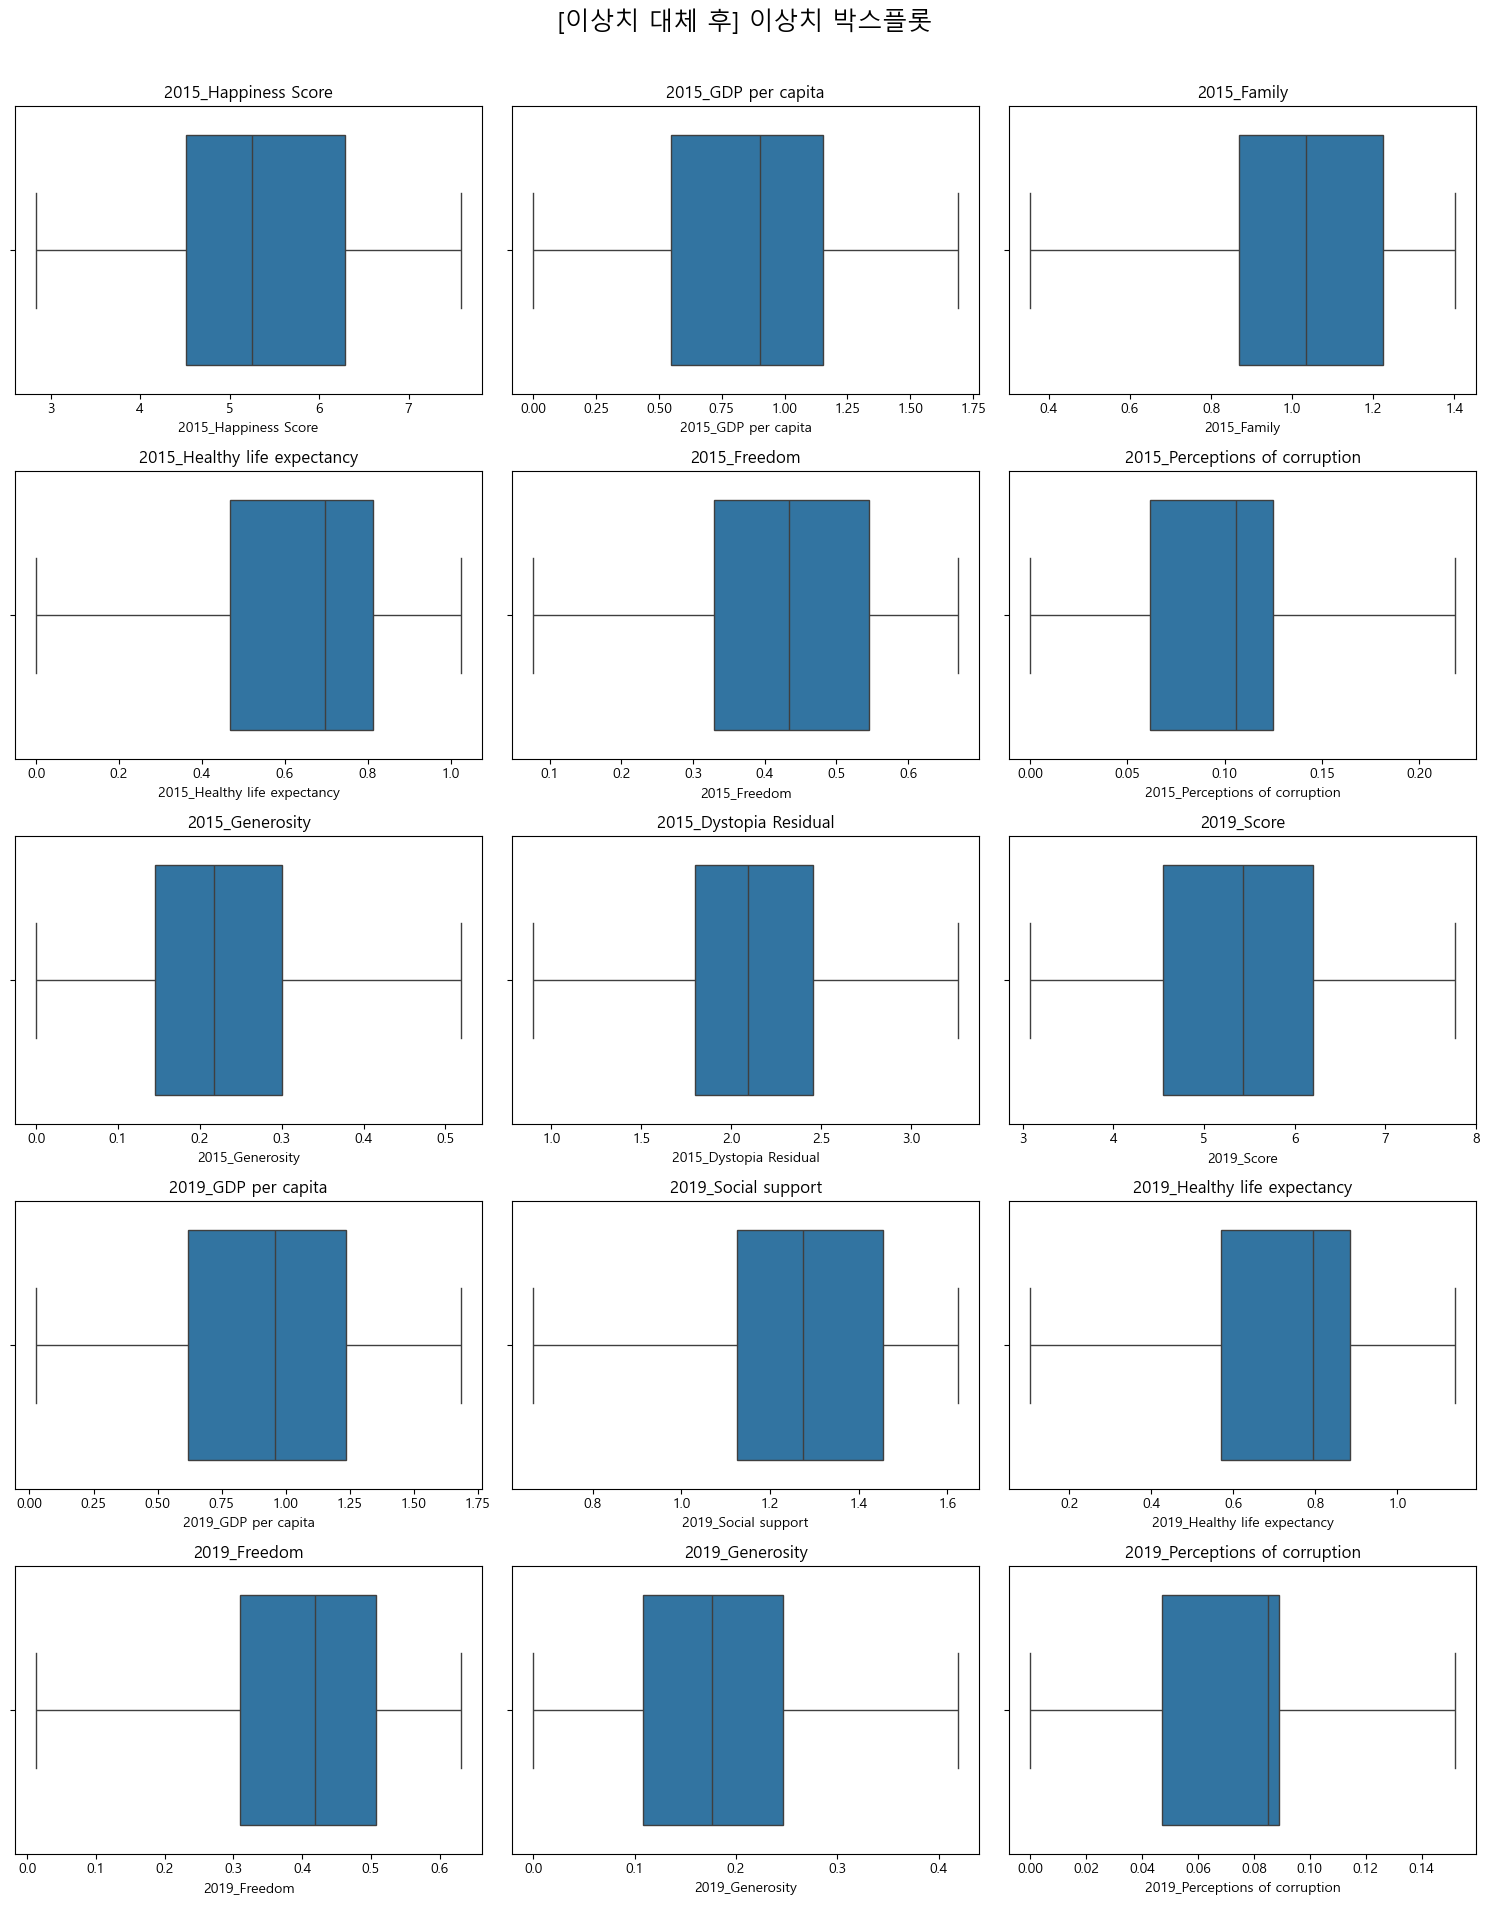

In [28]:
def plot_outliers(df, cols, n_cols=3, main_title=None):
    n_rows = (len(cols) + n_cols - 1) // n_cols
    plt.figure(figsize=(5 * n_cols, 4 * n_rows))

    for i, col in enumerate(cols):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.boxplot(x=df[col])
        plt.title(col)
        plt.xlabel(col)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    if main_title is not None:
        plt.suptitle(main_title, fontsize=18)
    plt.show()

plot_outliers(df_merge, numeric_cols_filtered, main_title='[이상치 대체 전] 이상치 박스플롯')
plot_outliers(df_filled, numeric_cols_filtered, main_title='[이상치 대체 후] 이상치 박스플롯')



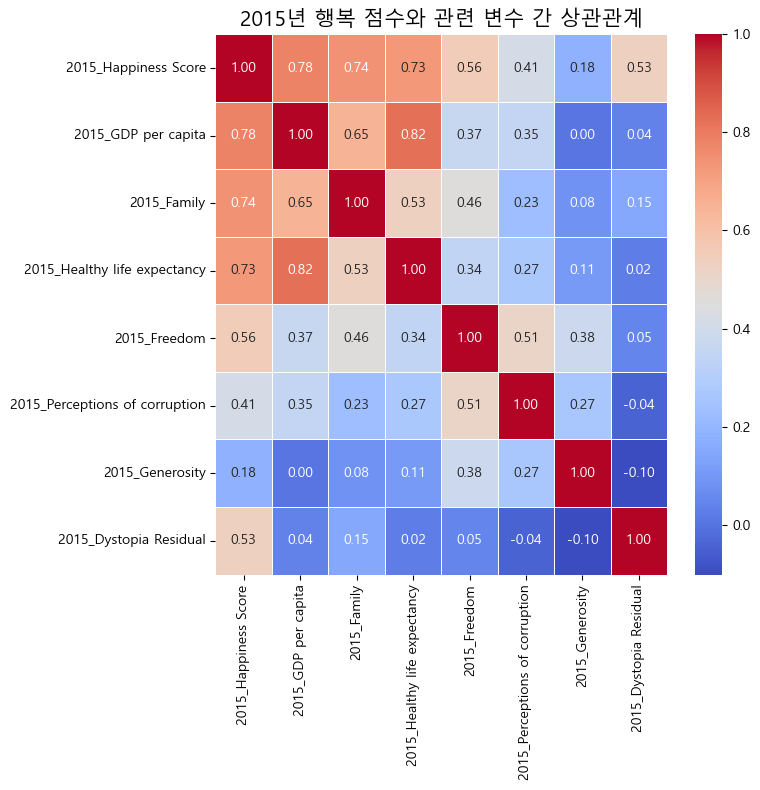

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# 2015년 주요 수치형 변수명 리스트 (컬럼이름에 맞게 수정)
cols_2015 = [
    '2015_Happiness Score',
    '2015_GDP per capita',
    '2015_Family',
    '2015_Healthy life expectancy',
    '2015_Freedom',
    '2015_Perceptions of corruption',
    '2015_Generosity',
    '2015_Dystopia Residual'
]

plt.figure(figsize=(8, 8))
sns.heatmap(df_merge[cols_2015].corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('2015년 행복 점수와 관련 변수 간 상관관계', fontsize=15)
plt.tight_layout()
plt.show()


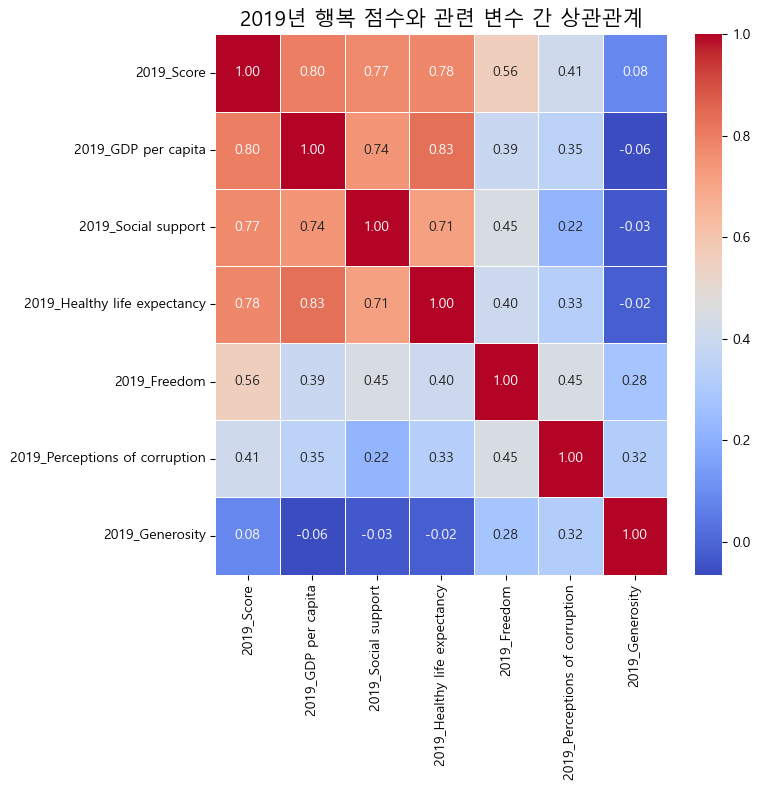

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# 2019년 주요 수치형 변수 리스트 (컬럼명에 맞게!)
cols_2019 = [
    '2019_Score',
    '2019_GDP per capita',
    '2019_Social support',
    '2019_Healthy life expectancy',
    '2019_Freedom',
    '2019_Perceptions of corruption',
    '2019_Generosity'
]

plt.figure(figsize=(8, 8))
sns.heatmap(df_merge[cols_2019].corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('2019년 행복 점수와 관련 변수 간 상관관계', fontsize=15)
plt.tight_layout()
plt.show()


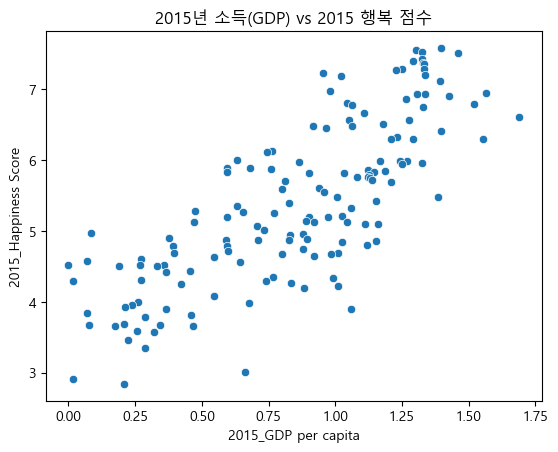

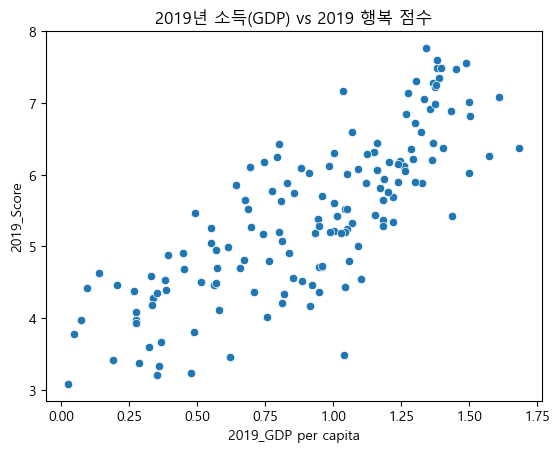

2015년 GDP와 행복 점수 상관계수: 0.78
2019년 GDP와 행복 점수 상관계수: 0.80


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# 산점도(2015년)
sns.scatterplot(x='2015_GDP per capita', y='2015_Happiness Score', data=df_merge)
plt.title("2015년 소득(GDP) vs 2015 행복 점수")
plt.xlabel("2015_GDP per capita")
plt.ylabel("2015_Happiness Score")
plt.show()

# 산점도(2019년)
sns.scatterplot(x='2019_GDP per capita', y='2019_Score', data=df_merge)
plt.title("2019년 소득(GDP) vs 2019 행복 점수")
plt.xlabel("2019_GDP per capita")
plt.ylabel("2019_Score")
plt.show()

# 상관계수 출력(2015년)
corr_2015 = df_merge[['2015_GDP per capita', '2015_Happiness Score']].corr().iloc[0,1]
print(f"2015년 GDP와 행복 점수 상관계수: {corr_2015:.2f}")

# 상관계수 출력(2019년)
corr_2019 = df_merge[['2019_GDP per capita', '2019_Score']].corr().iloc[0,1]
print(f"2019년 GDP와 행복 점수 상관계수: {corr_2019:.2f}")


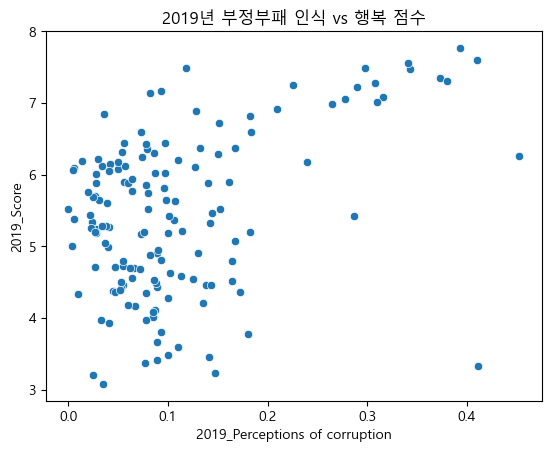

2019년 부정부패 인식과 행복점수 상관계수: 0.41


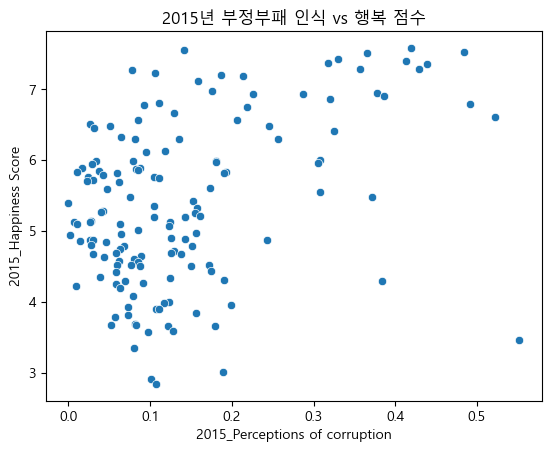

2015년 부정부패 인식과 행복점수 상관계수: 0.41


In [30]:
#2015년과 2019년데이터 분포도
num_cols = [
    'Score_2015', 'GDP_2015', 'Family_2015', 'Health_2015',
    'Freedom_2015', 'Corruption_2015', 'Generosity_2015',
    'Score_2019', 'GDP_2019', 'Social_2019', 'Health_2019',
    'Freedom_2019', 'Corruption_2019', 'Generosity_2019','Dystopia_2015',
    'Score_Diff', 'GDP_Diff', 'Rank_Diff'  # ← 변화량은 남긴다
]
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 18))

for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i + 1)
    sns.histplot(merged_df[col], kde=True, color='skyblue')
    plt.title(f'{col} 분포')
    plt.xlabel(col)
    plt.ylabel('빈도')

plt.tight_layout()
plt.show()



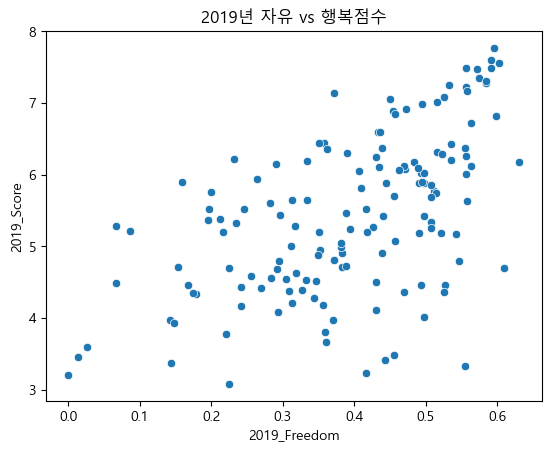

2019년 자유와 행복점수 상관계수: 0.56


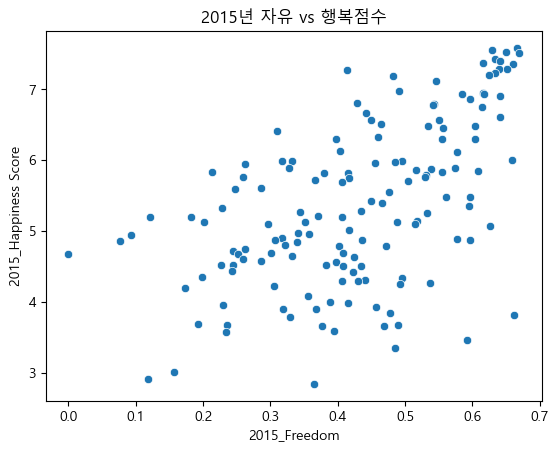

2015년 자유와 행복점수 상관계수: 0.56


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2019년 자유 vs 행복점수 산점도
sns.scatterplot(x='2019_Freedom', y='2019_Score', data=df_merge)
plt.title("2019년 자유 vs 행복점수")
plt.xlabel("2019_Freedom")
plt.ylabel("2019_Score")
plt.show()

# 2019년 상관계수
corr_free_2019 = df_merge[['2019_Freedom', '2019_Score']].corr().iloc[0,1]
print(f"2019년 자유와 행복점수 상관계수: {corr_free_2019:.2f}")

# 2015년 자유 vs 행복점수 산점도
sns.scatterplot(x='2015_Freedom', y='2015_Happiness Score', data=df_merge)
plt.title("2015년 자유 vs 행복점수")
plt.xlabel("2015_Freedom")
plt.ylabel("2015_Happiness Score")
plt.show()

# 2015년 상관계수
corr_free_2015 = df_merge[['2015_Freedom', '2015_Happiness Score']].corr().iloc[0,1]
print(f"2015년 자유와 행복점수 상관계수: {corr_free_2015:.2f}")
